In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv("/content/PhishingDataSet.csv")

# df

In [ ]:
# df2 = pd.read_csv("/content/fraud_email_.csv")

In [ ]:
chd_df = pd.read_csv("/content/Heart Diseases.csv")
chd_df

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
0,hdoamedhe7le8psut,63.0,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,hdoamedhodc3upsut,67.0,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,hdoamedds1byapsut,67.0,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,hdoamed03ldb7psut,37.0,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,hdoamedkixctypsut,41.0,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,hdoamed4f8a4lpsut,57.0,1,2,124,261,0,0,141,0,0.3,1,0,7,1
306,hdoamed5qpd5jpsut,44.0,0,3,118,242,0,0,149,0,0.3,2,1,3,0
307,hdoamedimjs34psut,51.0,1,3,100,222,0,0,143,1,1.2,2,0,3,0
308,hdoamedjkq7uepsut,55.0,1,4,140,217,0,0,111,1,5.6,3,0,7,3


In [ ]:
chd_df['ID'].duplicated().sum()

7

In [ ]:
sns.countplot(chd_df['outcome'], data = chd_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

### Age and CHD
Coronary Artery Disease is labeled a disease of senior citizens. But as many as 4% to 10% of all heart attacks occur before age 45, and most of these strike men. [2]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


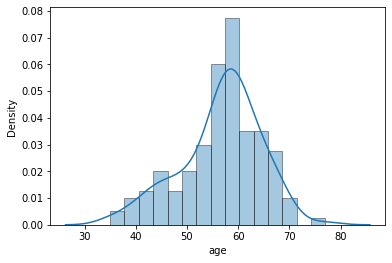

In [ ]:
#sns.distplot(chd_df, x = chd_df['age'])
# of the patients having chd:
chd_df_true = chd_df[chd_df['outcome'] != 0]
sns.distplot(chd_df_true['age'], hist=True, kde=True, 
             bins=15,
             hist_kws={'edgecolor':'black'});

### Sex, age and CHD

Coronary heart disease (CHD) is markedly more common in men than in women. In both sexes, CHD risk increases with age, 
but the increase is sharper in women.[1] That's our expectation from the data, let's see if it matches our assumption:

female = 0 male = 1

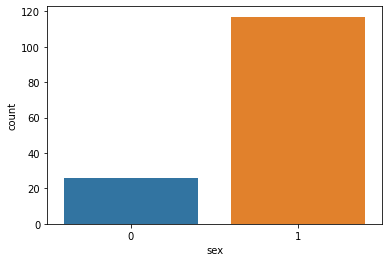

In [ ]:
# so this variable is considered imbalanced, does it need to be fixed?
sns.countplot(x ="sex", data = chd_df_true);

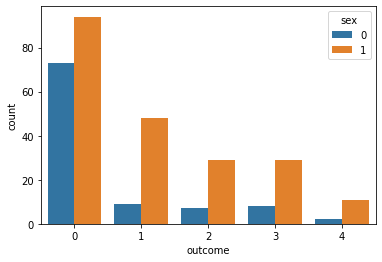

In [ ]:
# Can we consider all the CHD patients as 1?

sns.countplot(x ='outcome', data = chd_df, hue = 'sex');

This matches our previous assumption that CHD Is more common in men than in women.

> However we need to be careful, does it appear that CHD is more common in men than in women because the sex variable is imbalanced? or is it imbalanced because there's more men than women with CHD??

### Age, Sex and Cholestrol 

In most populations, serum total cholesterol increases as age increases. In men, 
this increase usually levels off around the age of 45 to 50 years,
whereas in women, the increase continues sharply until the age of 60 to 65 years.[1]

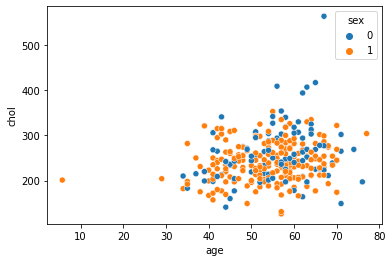

In [ ]:
sns.scatterplot(x = "age", y = "chol", hue = 'sex', data= chd_df_true.drop(chd_df['chol'].idxmax()));

So we can observe that there is a small positive correlation between age and cholostrol, however as our assumption, 
women seem have higher cholestrol values at older ages, around 60 and older.  

### Age, Sex and Blood Pressure

Like serum cholesterol, blood pressure also tends to increase with age, and more prominently in women than in men.
The increase in blood pressure and its different relations to age in men and women are probably explained in part by obesity. [1]

- So we can conclude from the previous research that blood pressure increase in women at an older age which can explain why coronary heart disease levels
out as both genders pass a certain age. 

Lets test this out

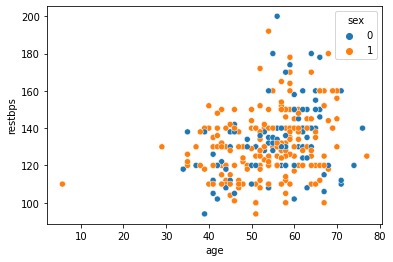

In [ ]:
sns.scatterplot(x = "age", y = "restbps", hue = 'sex', data= chd_df_true);

So we can see that women have higher blood pressure at older ages, however, in both genders blood pressure increases as the age increases.


### Age, Sex and Chest Pain Type

Angina ➡ Type of chest pain caused by reduced blood flow to the heart. 
- Value 1: Typical angina ➡ Discomfort that is noted when the heart does not get enough blood or oxygen. Typically, this is caused by blockage or plaque buildup in the coronary arteries. Men commonly have the usual kind of angina as described above. [4]

- Value 2: Atypical angina ➡ Unusual signs that occur in CHD patients such as fatigue, sleep disturbances, shortness of breath, and chest discomfort. This type of Angina is usually more common among women. [4]

- Value 3: Non-anginal pain ➡ Non-cardiac chest pain is the term that is used to describe pain in the chest that is not caused by heart disease or a heart attack.

- Value 4: Asymptomatic ➡ Occurs when the heart temporarily doesn’t receive enough blood (and thus oxygen), but the person with the oxygen-deprivation doesn’t notice any effects. 
  
  Occurs when one or more coronary arteries are narrowed by plaque. It can also occur when the heart is forced to work harder than normal.

  People who have diabetes or who have had a heart attack are most likely to develop silent ischemia.


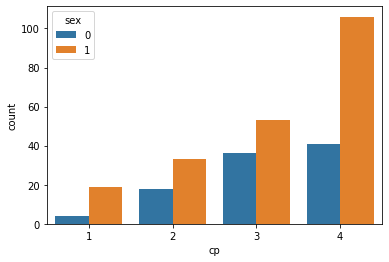

In [ ]:
sns.countplot(x = "cp", hue = "sex", data = chd_df);

It can be observed from this plot, that asymptomatic angina is the most common among both men and women. 

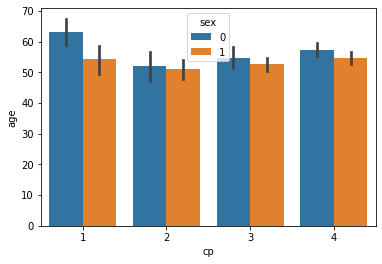

In [ ]:
sns.barplot(x = "cp", y = "age", hue = "sex", data = chd_df);

From the previous graph we can observe that patients women over 60 years old, had suffered anginal pain more than men, and both men and women around age 50 had atypical angina, however we should keep in mind that the data on women is smaller, so a higher percentage of women had atypical engina than men which matches our previous assumption.   

### Age, Sex and CHD Outcome

In older men, nearly all heart attacks are caused by atherosclerotic blockages in coronary arteries.
Conventional coronary artery disease also predominates in young adults, accounting for about 80% of heart attacks.
About 60% of these young patients have disease of just one coronary artery, 
 while older patients are more likely to have disease in two or three arteries. [2]

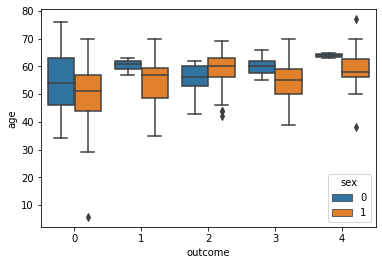

In [ ]:
sns.boxplot(x = "outcome", y = 'age', hue = 'sex', data = chd_df);

From here we can see that our previous assumption was not wrong, that younger patients tend to have lower numbers of blocked artieres, 
and older patients tend to have more blocked artieres. However there are some exceptions (outliers).

# **References**


[1] Jousilahti, P., Vartiainen, E., Tuomilehto, J. and Puska, P., 1999. Sex, Age, Cardiovascular Risk Factors, and Coronary Heart Disease. Circulation, [online] 99(9), pp.1165-1172. Available at: <https://www.ahajournals.org/doi/full/10.1161/01.CIR.99.9.1165> [Accessed 5 November 2021].

[2] Harvard Health. 2021. Premature Heart Disease - Harvard Health Publishing - Harvard Health. [online] Available at: <https://www.health.harvard.edu/heart-health/premature-heart-disease> [Accessed 5 November 2021].

[3] Mayo Clinic. 2021. Angina - Symptoms and causes. [online] Available at: <https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373#:~:text=Angina%20is%20a%20type%20of,or%20pain%20in%20your%20chest.> [Accessed 5 November 2021].

[4] Harrington HealthCare System. 2021. Typical and Atypical Angina: What to Look For - Harrington HealthCare System. [online] Available at: <https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/> [Accessed 5 November 2021].

[5] Cleveland Clinic. 2021. Non-Cardiac Chest Pain. [online] Available at: <https://my.clevelandclinic.org/health/diseases/15851-gerd-non-cardiac-chest-pain#:~:text=Non%2Dcardiac%20chest%20pain%20is,such%20as%20gastroesophageal%20reflux%20disease.> [Accessed 5 November 2021].